In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
data = pd.read_csv("codsoftirisflowerclassificationdataset.csv", delimiter=',') 

In [6]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB
None


In [8]:
# Display the first few rows of the dataset
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [11]:
# Check for missing values
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [14]:
#no need to handle misssing values as there are none in the given dataset

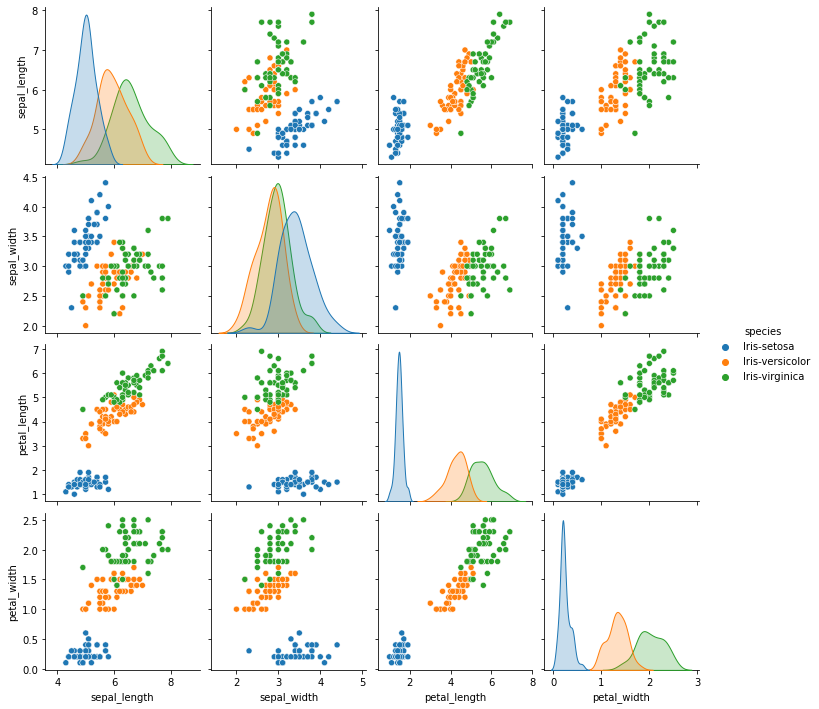

In [20]:
# Pairplot to visualize relationships between variables
sns.pairplot(data, hue="species", diag_kind="kde")
plt.show()

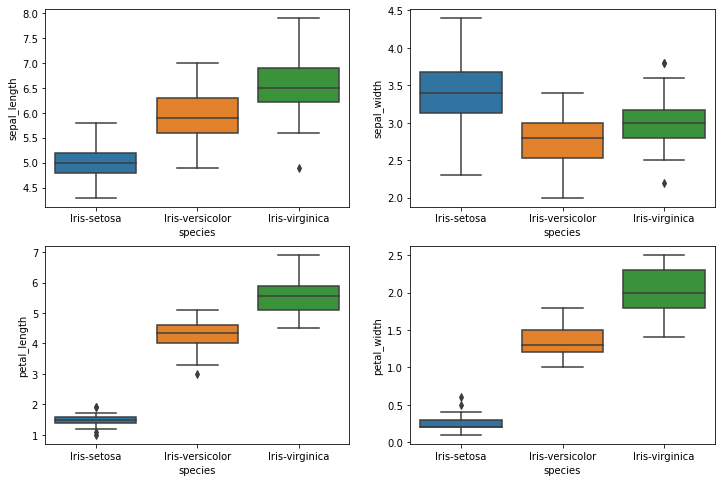

In [22]:
# Box plots to visualize the distribution of each feature for each species
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_length", data=data)
plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_width", data=data)
plt.subplot(2, 2, 3)
sns.boxplot(x="species", y="petal_length", data=data)
plt.subplot(2, 2, 4)
sns.boxplot(x="species", y="petal_width", data=data)
plt.show()

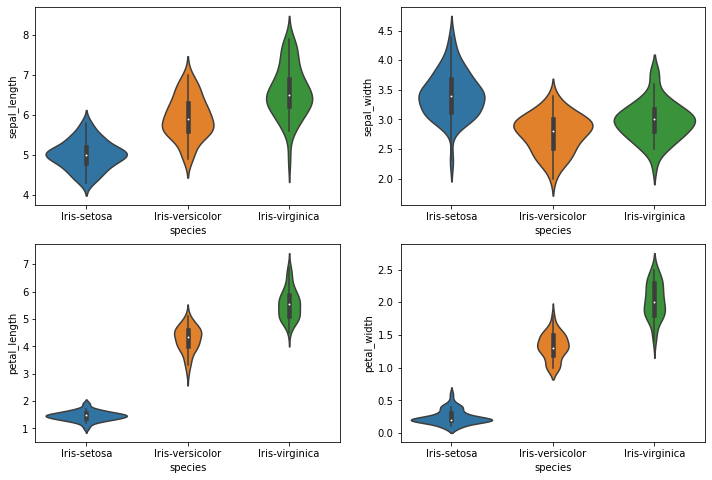

In [24]:
# Violin plots for a combination of box plot and KDE
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.violinplot(x="species", y="sepal_length", data=data)
plt.subplot(2, 2, 2)
sns.violinplot(x="species", y="sepal_width", data=data)
plt.subplot(2, 2, 3)
sns.violinplot(x="species", y="petal_length", data=data)
plt.subplot(2, 2, 4)
sns.violinplot(x="species", y="petal_width", data=data)
plt.show()

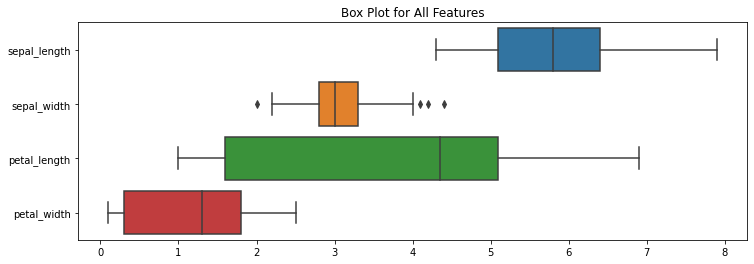

In [26]:
# Box plots for each feature
plt.figure(figsize=(12, 4))
sns.boxplot(data=data, orient="h")
plt.title("Box Plot for All Features")
plt.show()

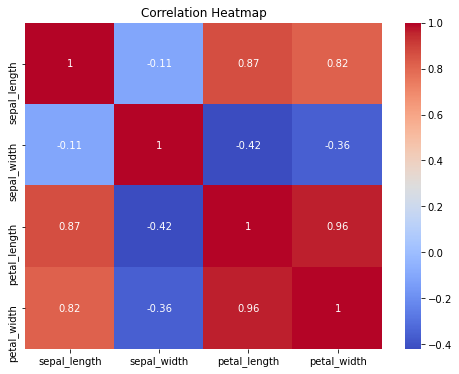

In [28]:
# Correlation heatmap
correlation = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [32]:
# Convert categorical species to numerical using LabelEncoder
label_encoder = LabelEncoder()
data["species"] = label_encoder.fit_transform(data["species"])

In [34]:
# Define the features and target variable
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
target = "species"

In [36]:
# Create the feature matrix X and target vector y
X = data[features]
y = data[target]

In [40]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [41]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32


In [38]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Initialize and train a K-Nearest Neighbors Classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
# Make predictions
y_pred = model.predict(X_test)

In [49]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate an analysis report
print("Model Evaluation Report:")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Model Evaluation Report:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


   Actual Species  Predicted Species
0               1                  1
1               0                  0
2               2                  2
3               1                  1
4               1                  1


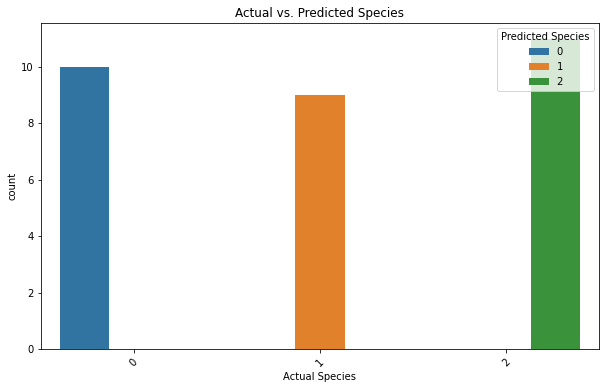

In [51]:
# Convert numerical species back to categorical using inverse_transform
predicted_species = label_encoder.inverse_transform(y_pred)

# Create a DataFrame to store the actual and predicted species
classification_results = pd.DataFrame({'Actual Species': label_encoder.inverse_transform(y_test),
                                       'Predicted Species': predicted_species})

# Display the first few rows of the classification results
print(classification_results.head())

# Countplot to visualize actual vs. predicted species
plt.figure(figsize=(10, 6))
sns.countplot(data=classification_results, x='Actual Species', hue='Predicted Species')
plt.title('Actual vs. Predicted Species')
plt.xticks(rotation=45)
plt.show()
